# Script to evaluate the ML-Models

Setup (load automl-models.pickle)

In [1]:
import pickle
import csv

with open(r"../app/_meta.csv") as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  list_qualities = list()
  for line in csv_reader:
    list_qualities.append(line[0])
  list_qualities = list_qualities[1:]

with open(r"../app/automl.pkl", "rb") as input_file:
  automl = pickle.load(input_file)

### Inspect the score:

In [2]:
automl.best_loss

0.370654086439158

Test with a random dataset:

In [3]:
import openml as oml

dataset = oml.datasets.get_dataset(12)

In [4]:
import pandas as pd

t = dict()

for quality in list_qualities:
  t[quality] = [dataset.qualities.get(quality)]
test_df = pd.DataFrame(t)

In [5]:
print(dict(zip(automl.classes_, automl.predict_proba(test_df)[0])))
print(automl.predict(test_df)[0])

{'ATM': 0.5320488084759794, 'AutoGluon': 0.005440963082630282, 'FLAML': 0.40600173450317156, 'H2O AutoML': 0.014511003325768159, 'Hyperopt-Sklearn': 0.007667888680881399, 'TPOT': 0.02480019895140548, 'TransmogrifAI': 0.0034334522959763264, 'auto-sklearn': 0.0060959506841874985}
ATM


In [6]:
import lightgbm as lgb
import matplotlib.pyplot as plt

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.plot_importance.html

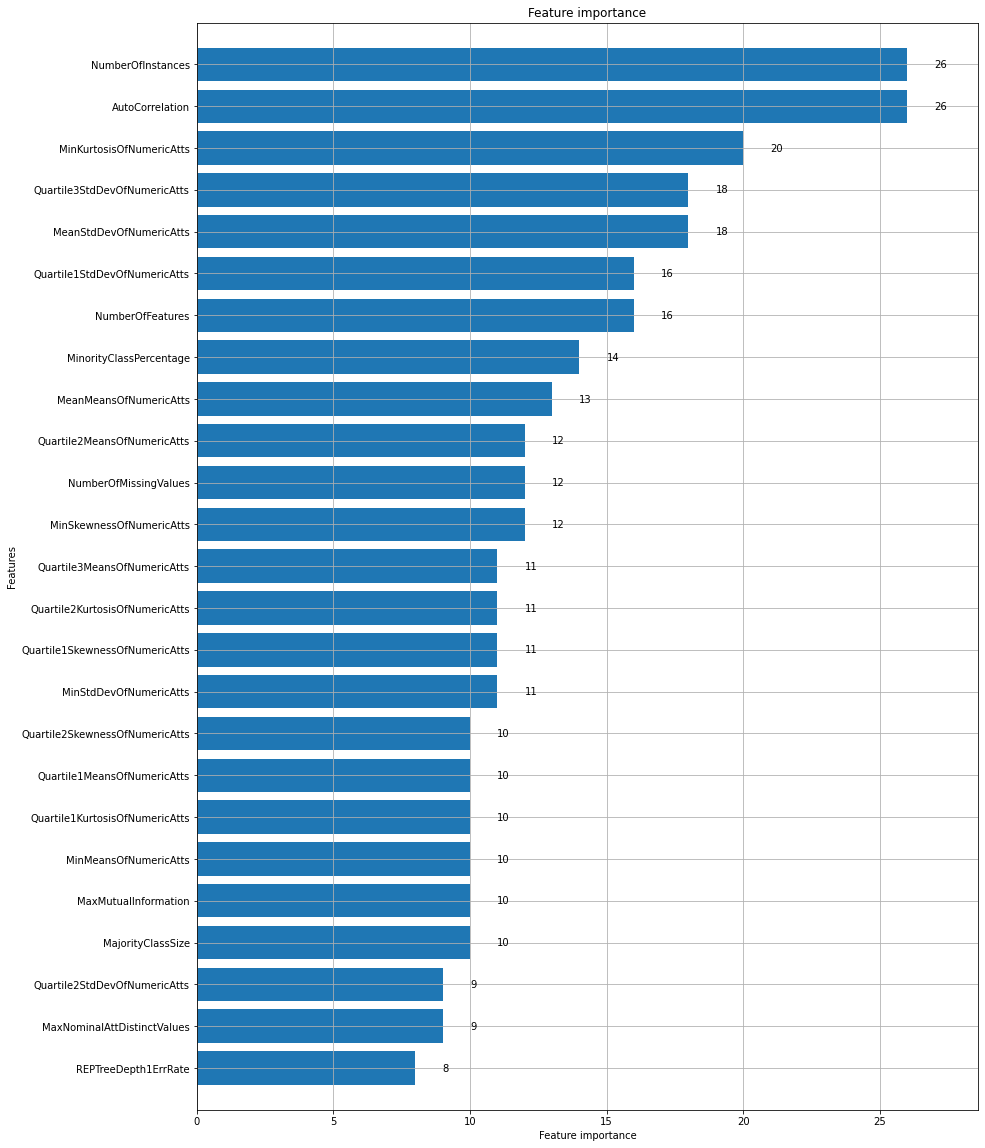

In [7]:
fig, ax = plt.subplots(figsize=(14,20))
lgb.plot_importance(automl.model.estimator, max_num_features=25, height=0.8, ax=ax)
plt.savefig('graphs/feature_importance.png', dpi=300)

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.plot_tree.html#lightgbm.plot_tree

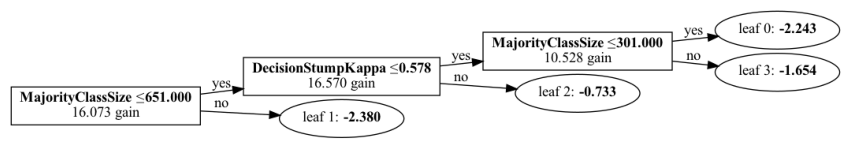

In [18]:
ax = lgb.plot_tree(automl.model.estimator, tree_index=0, figsize=(15, 15), show_info=['split_gain'])
plt.show()